<a href="https://colab.research.google.com/github/Shahzad-kml/ML1/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
print('total columns: ',len(data.columns),'\n', data.columns)

total columns:  21 
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
new_data=data[['sqft_living','price']]
new_data.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


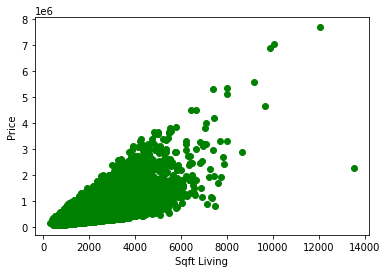

In [ ]:
plt.scatter(data.sqft_living, data.price, color='green')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler=mms()
scaled_data=pd.DataFrame(scaler.fit_transform(new_data),columns=new_data.columns)
scaled_data.head()

,sqft_living,price
0,0.067170,0.019266
1,0.172075,0.060721
2,0.036226,0.013770
3,0.126038,0.069377
4,0.104906,0.057049


In [ ]:
x=scaled_data.sqft_living
y=scaled_data.price

In [ ]:
x.shape,y.shape

((21613,), (21613,))

In [ ]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x, train_y, test_y=tts(x, y, random_state=101, test_size=0.15)
print(train_x.shape,train_y.shape)
train_x=train_x.values.reshape(-1,1)
train_y=train_y.values.reshape(-1,1)
print(train_x.shape,train_y.shape)
print(train_x)

(18371,) (18371,)
(18371, 1) (18371, 1)
[[0.15924528]
 [0.10113208]
 [0.06264151]
 ...
 [0.11245283]
 [0.06490566]
 [0.08754717]]


In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(18371, 1) (18371, 1) (3242,) (3242,)


In [ ]:
from sklearn.linear_model import LinearRegression 
Regression=LinearRegression()
Regression.fit(train_x,train_y)

LinearRegression()

In [ ]:
y_pred=Regression.predict(test_x.values.reshape(-1,1))

In [ ]:
y_pred

array([[0.02330733],
       [0.0594205 ],
       [0.07620035],
       ...,
       [0.03534505],
       [0.02257777],
       [0.06197395]])

In [ ]:
from sklearn.metrics import mean_squared_error as mse
print(Regression.coef_)
print(Regression.intercept_)
print(np.sqrt(mse(y_pred,test_y)))

[[0.48333282]]
[-0.00441591]
0.03534660321736581


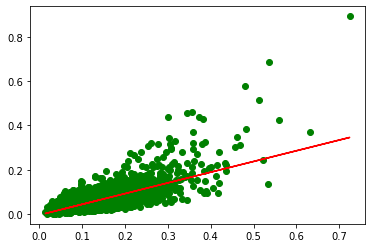

In [ ]:
plt.scatter(test_x, test_y, color='green')
plt.plot(test_x, y_pred, color='red')
plt.show()